In [75]:
import pandas as pd
from pandas import Series, DataFrame
import pandas_profiling
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import seaborn as sn


plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [76]:
data=pd.read_csv('Case_study_data_cleaned.csv')

In [77]:
data=data.drop([ 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22'],axis=1)

In [78]:
data.head()

,ACCOUNT_STATUS,SERVICE__PLAN,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,STATE,FEEDBACK,SATELLITE,SITE_TYPE_DESC,MOST_RECENT_SALES_CHANNEL,GENDER,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER,Y
0,Active,Unknown,Vars,Indirect,UNKNOWN,MD,Unkown,SPACEWAY3,Broadband Remote,HN7000 Upgrade,Female,69.0,0,1,0,N,0
1,Active,Pro,Sales Agents,Indirect,NCC,NJ,GOOD,HZN2-VER-4K,Spaceway,Retail,Female,43.0,4,1,0,N,0
2,Active,Power150,Call Center,Indirect,NCC,LA,BAD,SM5-VER-15K,Broadband Remote,National Sales,Female,58.0,4,1,0,N,0
3,Active,Power150,Sales Agents,Direct,TAG,OH,Unkown,SPACEWAY3,Spaceway,Direct,Male,22.0,6,1,1,Unknown,0
4,Active,Home,Call Center,Indirect,TAG,NY,GOOD,Unkown,Broadband Remote,DW6000 Upgrade,Male,36.0,7,0,0,Unknown,0


In [79]:
numeric_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['AGE', 'Y']
['ACCOUNT_STATUS', 'SERVICE__PLAN', 'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'STATE', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER']


In [50]:
categorical_features= ['ACCOUNT_STATUS', 'SERVICE__PLAN', 'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'STATE', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER']

In [80]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [81]:
for c_feature in categorical_features:
  data = create_dummies( data, c_feature )

In [82]:
data.head()

,AGE,Y,ACCOUNT_STATUS_Closed,ACCOUNT_STATUS_Inactive,SERVICE__PLAN_Basic_Ltd,SERVICE__PLAN_Elite,SERVICE__PLAN_Home,SERVICE__PLAN_Power15,SERVICE__PLAN_Power150,SERVICE__PLAN_Pro,...,INCOME_B,INCOME_C,INCOME_D,MARITAL_STATUS_1,MARITAL_STATUS_2,MARITAL_STATUS_Unkown,PRESENCE_OF_CHILDREN_1,PRESENCE_OF_CHILDREN_Unkown,COMPUTER_OWNER_Unknown,COMPUTER_OWNER_Y
0,69.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,43.0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,58.0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,22.0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
4,36.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [201]:
feature_columns = data.columns.difference( ['Y'] )


In [202]:
from sklearn.cross_validation import train_test_split


train_X, test_X, train_y, test_y = train_test_split( data[feature_columns],
                                                  data['Y'],
                                                  test_size = 0.2,
                                                  random_state = 33 )


In [204]:
tx= train_X
ty= train_y
tstx= test_X
tsty= test_y


In [205]:
tx.head()

,ACCOUNT_STATUS_Closed,ACCOUNT_STATUS_Inactive,AGE,COMPUTER_OWNER_Unknown,COMPUTER_OWNER_Y,DIRECT_INDIRECT_CHANNEL_Indirect,FEEDBACK_GOOD,FEEDBACK_Unkown,GENDER_Male,INCOME_1,...,STATE_ TN,STATE_ TX,STATE_ UT,STATE_ VA,STATE_ VT,STATE_ WA,STATE_ WI,STATE_ WV,STATE_ WY,STATE_CA
15876,1,0,30.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11518,1,0,43.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13849,1,0,66.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12052,1,0,73.0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
11990,1,0,23.0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [85]:
train_X.head()

,ACCOUNT_STATUS_Closed,ACCOUNT_STATUS_Inactive,AGE,COMPUTER_OWNER_Unknown,COMPUTER_OWNER_Y,DIRECT_INDIRECT_CHANNEL_Indirect,FEEDBACK_GOOD,FEEDBACK_Unkown,GENDER_Male,INCOME_1,...,STATE_ TN,STATE_ TX,STATE_ UT,STATE_ VA,STATE_ VT,STATE_ WA,STATE_ WI,STATE_ WV,STATE_ WY,STATE_CA
15876,1,0,30.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11518,1,0,43.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13849,1,0,66.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12052,1,0,73.0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
11990,1,0,23.0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=100 )
radm_clf.fit( train_X, train_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [88]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': radm_clf.predict( test_X ) } )

In [89]:
from sklearn import metrics
metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted )

0.99925

Text(0.5,16,'Predicted label')

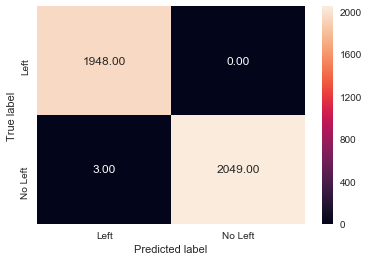

In [90]:
tree_cm = metrics.confusion_matrix( radm_test_pred.predicted,
                                 radm_test_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [91]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]

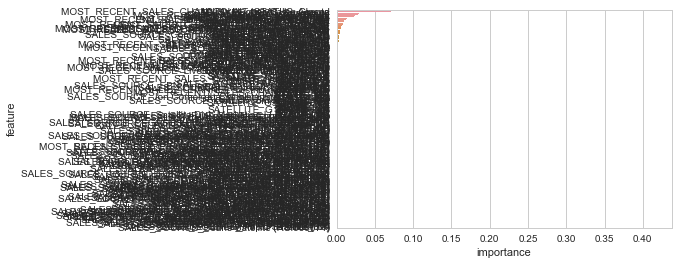

In [92]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sn.barplot( y = 'feature', x = 'importance', data = feature_rank )

In [106]:
list(feature_rank.feature[0:30])
top30 = list(feature_rank.feature[0:30])

In [107]:

top30

['ACCOUNT_STATUS_Closed',
 'MOST_RECENT_SALES_CHANNEL_Hughes Sales Agents',
 'MARITAL_STATUS_Unkown',
 'SITE_TYPE_DESC_Spaceway',
 'COMPUTER_OWNER_Y',
 'MOST_RECENT_SALES_CHANNEL_Direct',
 'SALES_CHANNEL_Web Orders',
 'SALES_CHANNEL_Call Centers',
 'SALES_CHANNEL_Retail/Others',
 'SALES_CHANNEL_Retail/others',
 'SALES_CHANNEL_Web orders',
 'SERVICE__PLAN_SO',
 'MOST_RECENT_SALES_CHANNEL_HN7000 Upgrade',
 'SALES_SOURCE_Red Ventures LLC (SA)',
 'FEEDBACK_GOOD',
 'SERVICE__PLAN_Power150',
 'SATELLITE_G3C-VER-24K',
 'SERVICE__PLAN_Unknown',
 'MOST_RECENT_SALES_CHANNEL_Dealer - Direct Order',
 'SATELLITE_SPACEWAY3',
 'MOST_RECENT_SALES_CHANNEL_Retail       ',
 'SATELLITE_SM6-HOR-10K',
 'AGE',
 'SERVICE__PLAN_Professional',
 'MOST_RECENT_SALES_CHANNEL_Dealer-Generated Sale',
 'MOST_RECENT_SALES_CHANNEL_HN9000 Upgrade',
 'MOST_RECENT_SALES_CHANNEL_DPC Classic upgrade',
 'SALES_SOURCE_DialAmerica Marketing Inc (CC)',
 'SATELLITE_SM5-VER-5K',
 'SATELLITE_SM5-VER-15K']

In [108]:
data1=pd.DataFrame(data,columns=['ACCOUNT_STATUS_Closed',
 'MOST_RECENT_SALES_CHANNEL_Hughes Sales Agents',
 'MARITAL_STATUS_Unkown',
 'SITE_TYPE_DESC_Spaceway',
 'COMPUTER_OWNER_Y',
 'MOST_RECENT_SALES_CHANNEL_Direct',
 'SALES_CHANNEL_Web Orders',
 'SALES_CHANNEL_Call Centers',
 'SALES_CHANNEL_Retail/Others',
 'SALES_CHANNEL_Retail/others',
 'SALES_CHANNEL_Web orders',
 'SERVICE__PLAN_SO',
 'MOST_RECENT_SALES_CHANNEL_HN7000 Upgrade',
 'SALES_SOURCE_Red Ventures LLC (SA)',
 'FEEDBACK_GOOD',
 'SERVICE__PLAN_Power150',
 'SATELLITE_G3C-VER-24K',
 'SERVICE__PLAN_Unknown',
 'MOST_RECENT_SALES_CHANNEL_Dealer - Direct Order',
 'SATELLITE_SPACEWAY3',
 'MOST_RECENT_SALES_CHANNEL_Retail       ',
 'SATELLITE_SM6-HOR-10K',
 'AGE',
 'SERVICE__PLAN_Professional',
 'MOST_RECENT_SALES_CHANNEL_Dealer-Generated Sale',
 'MOST_RECENT_SALES_CHANNEL_HN9000 Upgrade',
 'MOST_RECENT_SALES_CHANNEL_DPC Classic upgrade',
 'SALES_SOURCE_DialAmerica Marketing Inc (CC)',
 'SATELLITE_SM5-VER-5K',
 'SATELLITE_SM5-VER-15K','Y'])

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import scipy.stats as stats
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
%matplotlib inline

In [110]:
data1.columns

Index(['ACCOUNT_STATUS_Closed',
       'MOST_RECENT_SALES_CHANNEL_Hughes Sales Agents',
       'MARITAL_STATUS_Unkown', 'SITE_TYPE_DESC_Spaceway', 'COMPUTER_OWNER_Y',
       'MOST_RECENT_SALES_CHANNEL_Direct', 'SALES_CHANNEL_Web Orders',
       'SALES_CHANNEL_Call Centers', 'SALES_CHANNEL_Retail/Others',
       'SALES_CHANNEL_Retail/others', 'SALES_CHANNEL_Web orders',
       'SERVICE__PLAN_SO', 'MOST_RECENT_SALES_CHANNEL_HN7000 Upgrade',
       'SALES_SOURCE_Red Ventures LLC (SA)', 'FEEDBACK_GOOD',
       'SERVICE__PLAN_Power150', 'SATELLITE_G3C-VER-24K',
       'SERVICE__PLAN_Unknown',
       'MOST_RECENT_SALES_CHANNEL_Dealer - Direct Order',
       'SATELLITE_SPACEWAY3', 'MOST_RECENT_SALES_CHANNEL_Retail       ',
       'SATELLITE_SM6-HOR-10K', 'AGE', 'SERVICE__PLAN_Professional',
       'MOST_RECENT_SALES_CHANNEL_Dealer-Generated Sale',
       'MOST_RECENT_SALES_CHANNEL_HN9000 Upgrade',
       'MOST_RECENT_SALES_CHANNEL_DPC Classic upgrade',
       'SALES_SOURCE_DialAmerica Marketi

In [115]:
numeric_var_names=[key for key in dict(data1.dtypes) if dict(data1.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
# cat_var_names=[key for key in dict(data1.dtypes) if dict(data1.dtypes)[key] in ['object']]
print(numeric_var_names)
num_list= numeric_var_names

cat_var_names=cat_list=top30
# cat_var_names.remove('AGE')
print(cat_var_names)

['AGE', 'Y']
['ACCOUNT_STATUS_Closed', 'MOST_RECENT_SALES_CHANNEL_Hughes Sales Agents', 'MARITAL_STATUS_Unkown', 'SITE_TYPE_DESC_Spaceway', 'COMPUTER_OWNER_Y', 'MOST_RECENT_SALES_CHANNEL_Direct', 'SALES_CHANNEL_Web Orders', 'SALES_CHANNEL_Call Centers', 'SALES_CHANNEL_Retail/Others', 'SALES_CHANNEL_Retail/others', 'SALES_CHANNEL_Web orders', 'SERVICE__PLAN_SO', 'MOST_RECENT_SALES_CHANNEL_HN7000 Upgrade', 'SALES_SOURCE_Red Ventures LLC (SA)', 'FEEDBACK_GOOD', 'SERVICE__PLAN_Power150', 'SATELLITE_G3C-VER-24K', 'SERVICE__PLAN_Unknown', 'MOST_RECENT_SALES_CHANNEL_Dealer - Direct Order', 'SATELLITE_SPACEWAY3', 'MOST_RECENT_SALES_CHANNEL_Retail       ', 'SATELLITE_SM6-HOR-10K', 'SERVICE__PLAN_Professional', 'MOST_RECENT_SALES_CHANNEL_Dealer-Generated Sale', 'MOST_RECENT_SALES_CHANNEL_HN9000 Upgrade', 'MOST_RECENT_SALES_CHANNEL_DPC Classic upgrade', 'SALES_SOURCE_DialAmerica Marketing Inc (CC)', 'SATELLITE_SM5-VER-5K', 'SATELLITE_SM5-VER-15K']


In [114]:
chisq_df = pd.DataFrame()
for cat_variable in cat_list:
    cross_tab = pd.crosstab(data1[cat_variable],data1['Y'], margins=False)
    stats.chi2_contingency(observed=cross_tab)[1]
    temp = pd.DataFrame([cat_variable,stats.chi2_contingency(observed=cross_tab)[0],stats.chi2_contingency(observed=cross_tab)[1] ]).T
    temp.columns = ['Variable', 'ChiSquare','P-Value']
    chisq_df = pd.concat([chisq_df, temp], axis=0, ignore_index=True)
    
print(chisq_df, '\n')

## Numerical Variable
tstats_df = pd.DataFrame()
for num_variable in num_list:
    tstats = stats.ttest_ind(data1[data1['Y']==1][num_variable],data1[data1['Y']==0][num_variable])
    temp = pd.DataFrame([num_variable, tstats[0], tstats[1]]).T
    temp.columns = ['Variable Name', 'T-Statistic', 'P-Value']
    tstats_df = pd.concat([tstats_df, temp], axis=0, ignore_index=True)

print(tstats_df)

                                           Variable ChiSquare       P-Value
0                             ACCOUNT_STATUS_Closed   19934.1             0
1     MOST_RECENT_SALES_CHANNEL_Hughes Sales Agents   4726.21             0
2                             MARITAL_STATUS_Unkown   3447.56             0
3                           SITE_TYPE_DESC_Spaceway   3092.86             0
4                                  COMPUTER_OWNER_Y   2083.21             0
5                  MOST_RECENT_SALES_CHANNEL_Direct   1807.28             0
6                          SALES_CHANNEL_Web Orders   1524.92             0
7                        SALES_CHANNEL_Call Centers   1825.57             0
8                       SALES_CHANNEL_Retail/Others   1708.31             0
9                       SALES_CHANNEL_Retail/others    1555.7             0
10                         SALES_CHANNEL_Web orders   1493.14             0
11                                 SERVICE__PLAN_SO   1256.13  3.85351e-275
12         M

In [116]:
print(tstats_df.sort_values('P-Value',ascending=True))

print(chisq_df.sort_values('P-Value',ascending=True))

  Variable Name T-Statistic       P-Value
1             Y         inf             0
0           AGE      28.127  9.57301e-171
                                           Variable ChiSquare       P-Value
0                             ACCOUNT_STATUS_Closed   19934.1             0
10                         SALES_CHANNEL_Web orders   1493.14             0
9                       SALES_CHANNEL_Retail/others    1555.7             0
7                        SALES_CHANNEL_Call Centers   1825.57             0
6                          SALES_CHANNEL_Web Orders   1524.92             0
8                       SALES_CHANNEL_Retail/Others   1708.31             0
4                                  COMPUTER_OWNER_Y   2083.21             0
3                           SITE_TYPE_DESC_Spaceway   3092.86             0
2                             MARITAL_STATUS_Unkown   3447.56             0
1     MOST_RECENT_SALES_CHANNEL_Hughes Sales Agents   4726.21             0
5                  MOST_RECENT_SALES_C

In [117]:
ls=['AGE','ACCOUNT_STATUS_Closed','MOST_RECENT_SALES_CHANNEL_Hughes Sales Agents','MARITAL_STATUS_Unkown','SITE_TYPE_DESC_Spaceway','SALES_CHANNEL_Call Centers','COMPUTER_OWNER_Y','SALES_CHANNEL_Retail/Others','MOST_RECENT_SALES_CHANNEL_Direct','SALES_CHANNEL_Web orders','SALES_CHANNEL_Web Orders','SALES_CHANNEL_Retail/others']

In [118]:
f_data=pd.DataFrame(data,columns=ls)

In [119]:
f_data['Y']=data1.Y

In [120]:
pandas_profiling.ProfileReport(f_data)

Number of variables,13
Number of observations,19998
Total Missing (%),0.0%
Total size in memory,527.4 KiB
Average record size in memory,27.0 B
Numeric,1
Categorical,0
Boolean,11
Date,0
Text (Unique),0
Rejected,1


In [121]:
f_data.corr().T

,AGE,ACCOUNT_STATUS_Closed,MOST_RECENT_SALES_CHANNEL_Hughes Sales Agents,MARITAL_STATUS_Unkown,SITE_TYPE_DESC_Spaceway,SALES_CHANNEL_Call Centers,COMPUTER_OWNER_Y,SALES_CHANNEL_Retail/Others,MOST_RECENT_SALES_CHANNEL_Direct,SALES_CHANNEL_Web orders,SALES_CHANNEL_Web Orders,SALES_CHANNEL_Retail/others,Y
AGE,1.000000,0.195332,0.084633,0.079396,0.063459,0.054158,0.061957,0.069264,0.065811,-0.049234,0.060682,-0.056080,0.195086
ACCOUNT_STATUS_Closed,0.195332,1.000000,0.485474,0.414566,0.393015,0.300607,0.322363,0.292899,0.301024,-0.273034,0.276361,-0.278688,0.998501
MOST_RECENT_SALES_CHANNEL_Hughes Sales Agents,0.084633,0.485474,1.000000,0.191282,0.215977,0.156790,0.150862,0.130974,-0.309319,-0.132968,0.122109,-0.135721,0.486269
MARITAL_STATUS_Unkown,0.079396,0.414566,0.191282,1.000000,0.167163,0.075785,0.129773,0.118282,0.129141,-0.112701,0.104017,-0.113960,0.415331
SITE_TYPE_DESC_Spaceway,0.063459,0.393015,0.215977,0.167163,1.000000,0.121512,0.134730,0.105105,0.107735,-0.106636,0.095101,-0.106162,0.393368
SALES_CHANNEL_Call Centers,0.054158,0.300607,0.156790,0.075785,0.121512,1.000000,0.096941,-0.088434,0.084326,-0.082667,-0.083558,-0.084379,0.302319
COMPUTER_OWNER_Y,0.061957,0.322363,0.150862,0.129773,0.134730,0.096941,1.000000,0.103101,0.107827,-0.085356,0.069079,-0.090824,0.322870
SALES_CHANNEL_Retail/Others,0.069264,0.292899,0.130974,0.118282,0.105105,-0.088434,0.103101,1.000000,0.091829,-0.079971,-0.080833,-0.081628,0.292460
MOST_RECENT_SALES_CHANNEL_Direct,0.065811,0.301024,-0.309319,0.129141,0.107735,0.084326,0.107827,0.091829,1.000000,-0.084055,0.099042,-0.086664,0.300732
SALES_CHANNEL_Web orders,-0.049234,-0.273034,-0.132968,-0.112701,-0.106636,-0.082667,-0.085356,-0.079971,-0.084055,1.000000,-0.075562,-0.076305,-0.273444


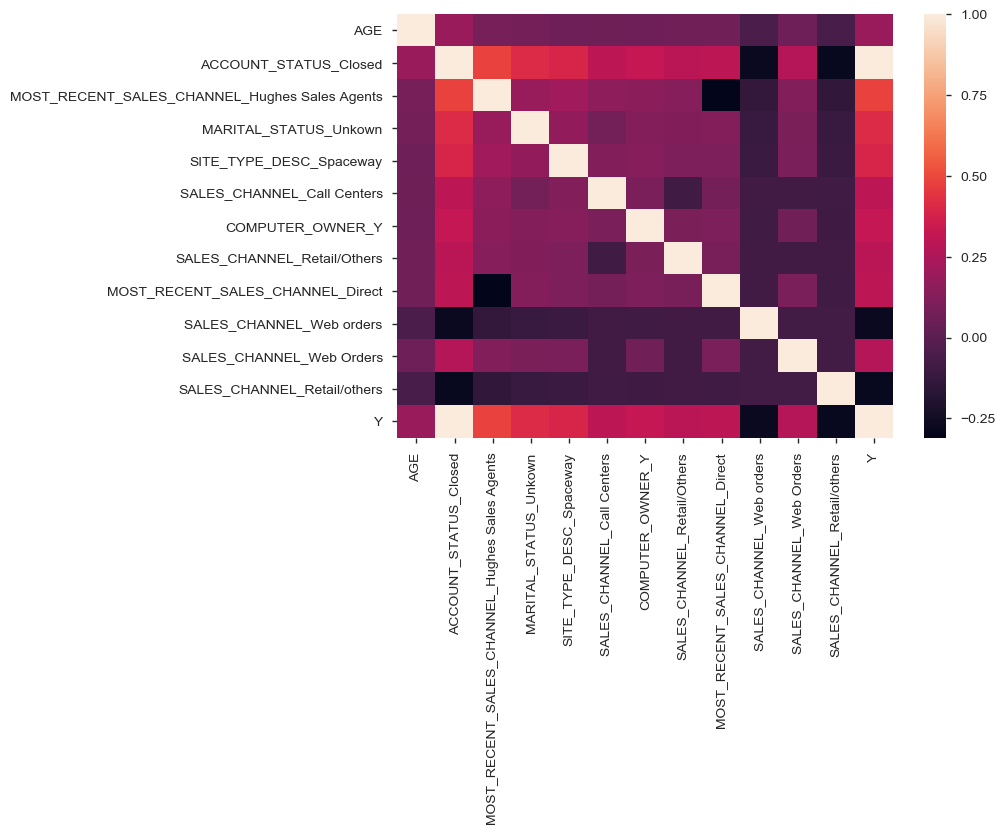

In [123]:
sns.heatmap(f_data.corr())

In [122]:
feature_columns = f_data.columns.difference( ['Y'] )

In [144]:
test_X.head()

,ACCOUNT_STATUS_Closed,AGE,COMPUTER_OWNER_Y,MARITAL_STATUS_Unkown,MOST_RECENT_SALES_CHANNEL_Direct,MOST_RECENT_SALES_CHANNEL_Hughes Sales Agents,SALES_CHANNEL_Call Centers,SALES_CHANNEL_Retail/Others,SALES_CHANNEL_Retail/others,SALES_CHANNEL_Web Orders,SALES_CHANNEL_Web orders,SITE_TYPE_DESC_Spaceway
16808,1,71.0,0,1,0,1,0,0,0,0,0,0
7294,0,30.0,0,0,0,0,0,0,0,0,0,0
3149,0,62.0,0,0,0,0,0,0,0,0,0,0
2238,0,32.0,0,0,0,0,0,0,0,0,0,0
9361,0,27.0,1,0,0,0,0,0,0,0,0,0


In [123]:
from sklearn.cross_validation import train_test_split


train_X, test_X, train_y, test_y = train_test_split( data[feature_columns],
                                                  data['Y'],
                                                  test_size = 0.2,
                                                  random_state = 441 )

In [124]:
# Building Models
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit( train_X, train_y )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [133]:
list( zip( feature_columns, logreg.coef_[0] ) )

[('ACCOUNT_STATUS_Closed', 10.630188674912082),
 ('AGE', -0.02464952732535884),
 ('COMPUTER_OWNER_Y', 0.8807068195833082),
 ('MARITAL_STATUS_Unkown', 1.509539455875538),
 ('MOST_RECENT_SALES_CHANNEL_Direct', 0.7433598356963339),
 ('MOST_RECENT_SALES_CHANNEL_Hughes Sales Agents', 3.469398722134956),
 ('SALES_CHANNEL_Call Centers', 3.380405750117693),
 ('SALES_CHANNEL_Retail/Others', 1.0400029724308542),
 ('SALES_CHANNEL_Retail/others', -1.3356327582576977),
 ('SALES_CHANNEL_Web Orders', 1.4463249502037998),
 ('SALES_CHANNEL_Web orders', -1.317737109293394),
 ('SITE_TYPE_DESC_Spaceway', 0.690940965642512)]

In [134]:
logreg.intercept_

array([-5.04067967])

In [160]:
test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': logreg.predict( test_X ) } )

In [161]:
test_pred = test_pred.reset_index()

In [162]:
test_pred.sample( n = 10 )

,index,actual,predicted
1860,8524,0,0
3069,116,0,0
2181,15781,1,1
2032,15745,1,1
3253,15158,1,1
3649,16520,1,1
533,8457,0,0
1203,3242,0,0
167,4537,0,0
680,9748,0,0


In [164]:

from sklearn import metrics

cm = metrics.confusion_matrix( test_pred.actual,
                            test_pred.predicted, [1,0] )
cm

array([[1995,    1],
       [   0, 2004]], dtype=int64)

Text(0.5,28.3611,'Predicted label')

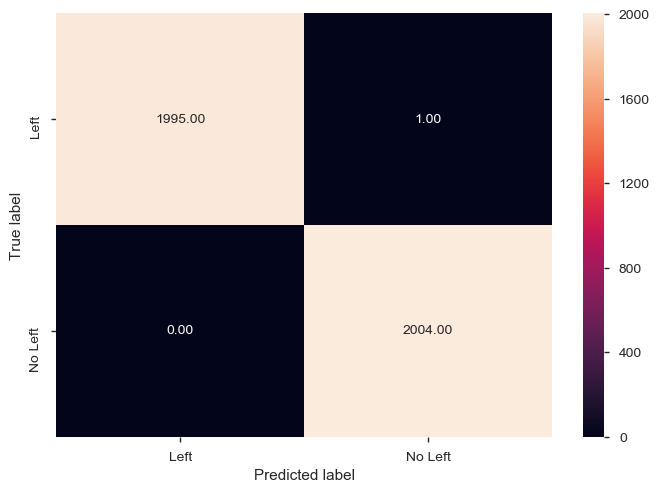

In [165]:
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [166]:
score = metrics.accuracy_score( test_pred.actual, test_pred.predicted )
round( float(score), 2 )

1.0

In [167]:
print( test_X[:1])
print (logreg.predict_proba( test_X[:1] ))

       ACCOUNT_STATUS_Closed   AGE  COMPUTER_OWNER_Y  MARITAL_STATUS_Unkown  \
16808                      1  71.0                 0                      1   

       MOST_RECENT_SALES_CHANNEL_Direct  \
16808                                 0   

       MOST_RECENT_SALES_CHANNEL_Hughes Sales Agents  \
16808                                              1   

       SALES_CHANNEL_Call Centers  SALES_CHANNEL_Retail/Others  \
16808                           0                            0   

       SALES_CHANNEL_Retail/others  SALES_CHANNEL_Web Orders  \
16808                            0                         0   

       SALES_CHANNEL_Web orders  SITE_TYPE_DESC_Spaceway  
16808                         0                        0  
[[1.47973297e-04 9.99852027e-01]]


In [168]:
predict_proba_df = pd.DataFrame( logreg.predict_proba( test_X ) )
predict_proba_df.head()

,0,1
0,0.000148,0.999852
1,0.996921,0.003079
2,0.998599,0.001401
3,0.997069,0.002931
4,0.992041,0.007959


In [169]:
test_pred = pd.concat( [test_pred, predict_proba_df], axis = 1 )

In [170]:
test_pred.columns =['index','achual','predicted','Y_0','Y_1']
test_pred.head()

,index,achual,predicted,Y_0,Y_1
0,16808,1,1,0.000148,0.999852
1,7294,0,0,0.996921,0.003079
2,3149,0,0,0.998599,0.001401
3,2238,0,0,0.997069,0.002931
4,9361,0,0,0.992041,0.007959


In [172]:
auc_score = metrics.roc_auc_score(test_pred.achual,test_pred.Y_1)
round(float(auc_score),2)

1.0

C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


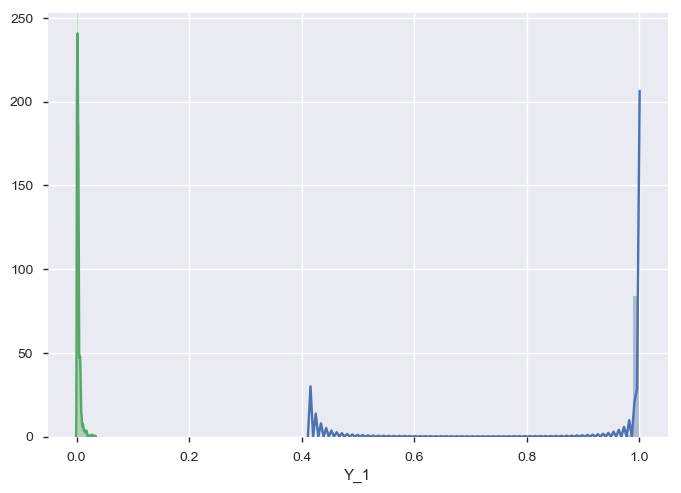

In [173]:
sn.distplot(test_pred[test_pred.achual==1]['Y_1'],color ='b')
sn.distplot(test_pred[test_pred.achual==0]['Y_1'],color= 'g')

In [246]:
test_pred.achual.head()

0    1
1    0
2    0
3    0
4    0
Name: achual, dtype: int64

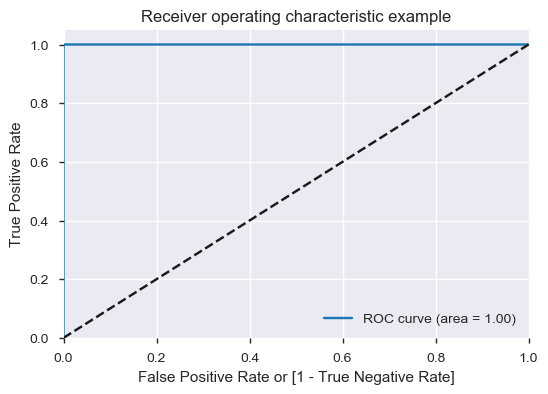

In [176]:
# Finding the optimal cutoff probability
fpr, tpr, thresholds = metrics.roc_curve( test_pred.achual,
                                     test_pred.Y_1,
                                     drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [183]:
print(fpr[0:10])
print(tpr[0:10])
print(thresholds[0:10])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.001002   0.00150301 0.00200401 0.00250501 0.00300601 0.00350701
 0.00400802 0.00450902 0.00551102 0.00601202]
[0.99999964 0.99999962 0.9999995  0.99999949 0.99999936 0.99999933
 0.99999931 0.99999908 0.99999903 0.99999898]


In [184]:
cutoff_prob = thresholds[(np.abs(tpr-0.7)).argmin()]

In [185]:
round(float(cutoff_prob),2)

1.0

In [192]:
test_pred['new_labels']= test_pred['Y_1'].map(lambda x: 1if x >= .4 else 0)

In [193]:
test_pred[0:10]

,index,achual,predicted,Y_0,Y_1,new_labels
0,16808,1,1,0.000148,0.999852,1
1,7294,0,0,0.996921,0.003079,0
2,3149,0,0,0.998599,0.001401,0
3,2238,0,0,0.997069,0.002931,0
4,9361,0,0,0.992041,0.007959,0
5,219,0,0,0.999593,0.000407,0
6,2163,0,0,0.994291,0.005709,0
7,9407,0,0,0.988378,0.011622,0
8,15703,1,1,0.000031,0.999969,1
9,15110,1,1,0.001326,0.998674,1


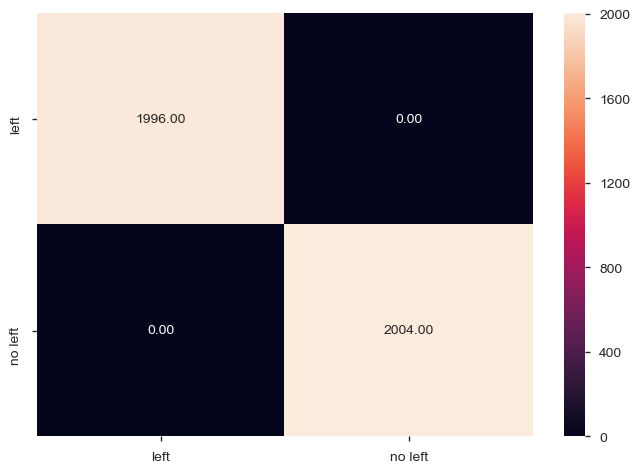

In [194]:
cm = metrics.confusion_matrix(test_pred.achual,
                             test_pred.new_labels,[1,0])
sn.heatmap(cm,annot=True,fmt='.2f',xticklabels= ['left','no left'],yticklabels= ['left','no left'])


# Decision Tree model

In [195]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier,export_graphviz,export
from sklearn.grid_search import GridSearchCV

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [196]:
param_grid = {'max_depth': np.arange(3,15)}

In [206]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid,cv =10)
tree.fit(tx,ty)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [207]:
tree.best_params_

{'max_depth': 9}

In [208]:
tree.best_score_

0.9998749843730467

In [209]:
clf_tree = DecisionTreeClassifier(max_depth = 9)
clf_tree.fit(tx,ty)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [213]:
tree_test_pred = pd.DataFrame({'achual': tsty,
                              'predicted': clf_tree.predict(tstx)})

In [214]:
tree_test_pred.sample(n=10)

,achual,predicted
5235,0,0
6761,0,0
10484,1,1
15152,1,1
18124,1,1
11207,1,1
16218,1,1
3401,0,0
884,0,0
18099,1,1


In [215]:
metrics.accuracy_score(tree_test_pred.achual,tree_test_pred.predicted)

0.9995

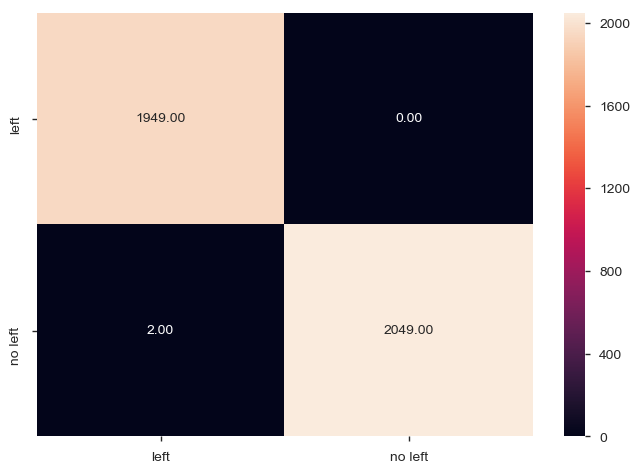

In [216]:
tree_cm = metrics.confusion_matrix(tree_test_pred.predicted,
                                  tree_test_pred.achual,
                                  [1,0])
sn.heatmap(tree_cm,annot=True,fmt='.2f',xticklabels=['left','no left'],yticklabels=['left','no left'])


# Boosting

In [217]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [218]:
paragrid_ada= { 'n_estimators':[100,200,400,600,800],
              'learning_rate':[10**x for x in range(-3,3)]}

In [235]:
from sklearn.grid_search import GridSearchCV
gscv_ada = GridSearchCV(estimator=AdaBoostClassifier(),param_grid=paragrid_ada,cv=5,verbose=True,n_jobs=-1)

In [221]:
tx.head()

,ACCOUNT_STATUS_Closed,ACCOUNT_STATUS_Inactive,AGE,COMPUTER_OWNER_Unknown,COMPUTER_OWNER_Y,DIRECT_INDIRECT_CHANNEL_Indirect,FEEDBACK_GOOD,FEEDBACK_Unkown,GENDER_Male,INCOME_1,...,STATE_ TN,STATE_ TX,STATE_ UT,STATE_ VA,STATE_ VT,STATE_ WA,STATE_ WI,STATE_ WV,STATE_ WY,STATE_CA
15876,1,0,30.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11518,1,0,43.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13849,1,0,66.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12052,1,0,73.0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
11990,1,0,23.0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [222]:
gscv_ada.fit(tx,ty)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 59.6min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 400, 600, 800], 'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=True)

In [223]:
gscv_ada.best_params_

{'learning_rate': 0.01, 'n_estimators': 200}

In [225]:
clf_ada= gscv_ada.best_estimator_
clf_ada

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.01, n_estimators=200, random_state=None)

In [226]:
gscv_ada.best_score_

0.99981247655957

In [224]:
ad=AdaBoostClassifier(learning_rate=0.01, n_estimators=200)
ad.fit(tx,ty)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.01, n_estimators=200, random_state=None)

In [227]:
from sklearn.cross_validation import cross_val_score

In [228]:
print(pd.Series(cross_val_score(clf_ada,tx,ty,cv=10)).describe()[['min','mean','max']])
print(pd.Series(cross_val_score(clf_ada,tstx,tsty,cv=10)).describe()[['min','mean','max']])

min     0.999375
mean    0.999812
max     1.000000
dtype: float64
min     0.995000
mean    0.998751
max     1.000000
dtype: float64


In [230]:
print(pd.Series(cross_val_score(clf_ada,tstx,tsty,cv=10)))

0    0.997506
1    1.000000
2    1.000000
3    1.000000
4    0.995000
5    1.000000
6    0.997500
7    1.000000
8    0.997500
9    1.000000
dtype: float64


Gradient boosting

In [236]:
# GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV
gscv_gradient = GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=paragrid_ada,cv=5,verbose=True,n_jobs=-1)

In [237]:
gscv_gradient.fit(tx,ty)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 59.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 400, 600, 800], 'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=True)

In [238]:
gscv_gradient.best_params_

{'learning_rate': 0.001, 'n_estimators': 100}

In [239]:
clf_gradient= gscv_gradient.best_estimator_
clf_gradient

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.001, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [242]:
gscv_gradient.best_score_

0.9997499687460932

In [243]:
gd=GradientBoostingClassifier(learning_rate=0.001, n_estimators=100)
gd.fit(tx,ty)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.001, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [244]:
print(pd.Series(cross_val_score(clf_gradient,tx,ty,cv=10)).describe()[['min','mean','max']])
print(pd.Series(cross_val_score(clf_gradient,tstx,tsty,cv=10)).describe()[['min','mean','max']])

min     0.999375
mean    0.999750
max     1.000000
dtype: float64
min     0.995000
mean    0.998751
max     1.000000
dtype: float64


In [245]:
print(pd.Series(cross_val_score(clf_gradient,tstx,tsty,cv=10)))

0    0.997506
1    1.000000
2    1.000000
3    1.000000
4    0.995000
5    1.000000
6    0.997500
7    1.000000
8    0.997500
9    1.000000
dtype: float64
